# Boston Marathon project

Using results 2014 database with link: https://github.com/llimllib/bostonmarathon/blob/master/results/2014/results.csv 


In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore")

In [129]:
# import database
df = pd.read_csv('results 2014 clear.csv')
pd.options.display.max_columns=None
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,1,8,NaN,71.4,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.1
2,16.62,"Van Dyk, Ernst F.",1,45.8,M,41,80.60,2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.1,RSA,Paarl,76.1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,2,3,NaN,116.37,27,5.37,NaN,99.33,16.2,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.6,36.58,JPN,Nogata Fukuoka,76.72


In [130]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [131]:
df.shape

(31984, 21)

# Cleaning data 

In [132]:
#df.info()
print("Count of null entries")
display(df.isnull().sum())

Count of null entries


10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [133]:
df.drop("ctz", axis=1,inplace=True)

In [134]:
df.state.fillna("-", inplace=True)

In [135]:
# Kiểm tra dữ liệu cột '10k'
df['10k'].value_counts(dropna=False)

-        50
48.38    47
48.97    47
48.75    42
48.02    42
48.87    41
47.62    41
49.42    41
48.3     40
48.95    40
47.88    40
49.47    39
48.28    38
47.2     38
49.88    37
48.17    37
48.03    37
49.3     37
47.13    37
48.65    37
47.8     36
48.08    36
49.03    36
47.95    36
49.73    36
49.02    36
48.25    36
42.35    36
49.32    36
50.05    36
         ..
74.38     1
79.67     1
94.98     1
76.82     1
80.67     1
77.75     1
86.52     1
81.82     1
71.93     1
80.02     1
77.23     1
32.92     1
21.47     1
72.5      1
92.17     1
67.52     1
78.6      1
67.73     1
72.42     1
77.2      1
33.3      1
75.68     1
70.28     1
77.4      1
86.6      1
75.1      1
76.38     1
21.13     1
78.02     1
72.8      1
Name: 10k, Length: 2766, dtype: int64

In [136]:
df['10k'].replace("-", 0, inplace=True)

In [137]:
df['25k'].replace("-", 0, inplace=True)
df['35k'].replace("-", 0, inplace=True)
df['5k'].replace("-", 0, inplace=True)
df['half'].replace("-", 0, inplace=True)
df['20k'].replace("-", 0, inplace=True)
df['40k'].replace("-", 0, inplace=True)

In [138]:
from sklearn import preprocessing
CategoricalEncoder = preprocessing.LabelEncoder()
CategoricalEncoder.fit(df.gender)
df.gender = CategoricalEncoder.transform(df.gender)


In [139]:
# View the labels 
print(list(CategoricalEncoder.classes_))

for i, classes in enumerate(CategoricalEncoder.classes_):
    print("Labels:",classes + ", Category value:",i )

['F', 'M']
Labels: F, Category value: 0
Labels: M, Category value: 1


In [140]:
def clean_bib(bib_string):
    known_prefixes = 'FW'
    if bib_string[0] in known_prefixes:
        return int(bib_string[1:])
    else:
        return int(bib_string)

In [141]:
 df['bib'] = pd.to_numeric(df['bib'], errors='coerce')
#df['bib'] = df['bib'].apply(bib_string)

In [146]:
#df['bib'].value_counts(dropna=False)
#df.info()

In [147]:
df = df.convert_objects(convert_numeric=True)

In [148]:
df.describe()
#df.to_csv('results 2014 clear.csv')

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31944.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.718298,1932.563032,132.709723,0.550807,42.407079,242.997314,18147.632097,8051.044741,196.648339,15939.587825,9.275658,164.571219,25.713685,111.413195,105.543107,228.722255
std,9.189281,1715.228694,27.758446,0.497420,11.316496,52.300431,10395.933343,4754.005626,42.444377,9232.978224,1.992486,33.953683,4.447068,21.692902,20.209809,49.775681
min,0.000000,1.000000,0.000000,0.000000,18.000000,80.600000,1.000000,1.000000,0.000000,1.000000,3.080000,56.450000,0.000000,0.000000,0.000000,0.000000
25%,45.370000,610.000000,115.100000,0.000000,33.000000,205.527500,9118.750000,3972.000000,167.050000,7943.750000,7.850000,140.670000,22.630000,96.750000,91.700000,193.700000
50%,50.320000,1425.000000,128.670000,1.000000,42.000000,232.370000,18280.500000,7970.000000,188.120000,15939.500000,8.870000,157.730000,25.080000,107.775000,102.100000,218.780000
75%,57.150000,2611.000000,147.555000,1.000000,50.000000,273.235000,27218.250000,11968.000000,220.120000,23935.250000,10.430000,182.880000,28.455000,123.030000,116.480000,257.405000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,35912.000000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


# visualizations

64
63


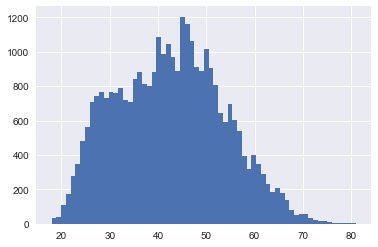

In [149]:
print(len(df['age'].unique()))
print(df['age'].max() - df['age'].min())
df['age'].hist(bins=64)

In [150]:
df['gender'].value_counts()

1    17617
0    14367
Name: gender, dtype: int64

[]

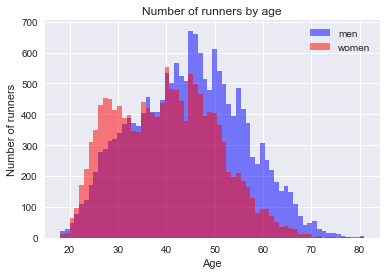

In [151]:
df[df['gender']==True]['age'].hist(bins=64, color='b', alpha=0.5)
df[df['gender']==False]['age'].hist(bins=64, color='r', alpha=0.5)
plt.legend(['men','women'])
plt.xlabel('Age')
plt.ylabel('Number of runners')
plt.title('Number of runners by age')
plt.plot()

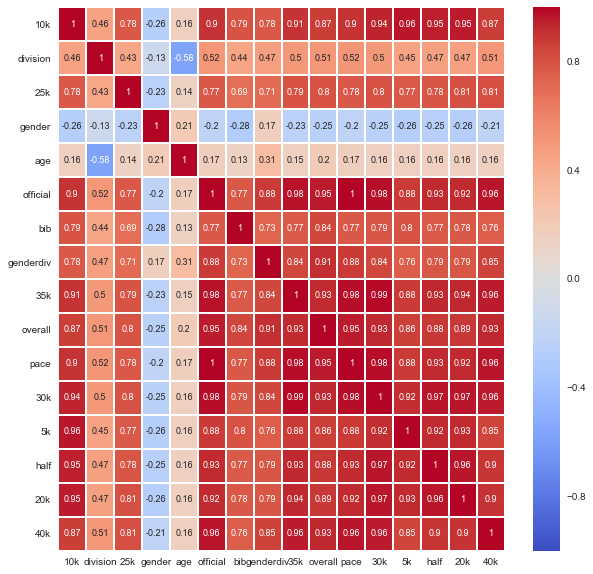

In [152]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={'size': 9})

division, gender, age, bid, genderdiv có sự tương quan thấp

# Analysis

In [155]:
outliers_df   = df[['bib','age','gender','division','5k','10k','20k','half','25k','30k','35k','40k']]
outliers_df .head().T


,0,1,2,3,4
bib,1.00,1.00,2.00,2.00,3.00
age,47.00,33.00,41.00,24.00,40.00
gender,1.00,0.00,1.00,0.00,1.00
division,8.00,1.00,1.00,3.00,2.00
5k,8.02,16.22,7.75,16.20,8.02
10k,17.37,32.58,16.62,32.57,17.12
20k,37.65,65.83,36.10,65.83,36.58
half,39.72,69.47,38.03,69.47,38.60
25k,47.67,82.43,45.80,82.43,46.37
30k,59.18,99.33,56.45,99.33,57.03


In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [167]:
#df['10k'] = df['10k'].astype(int)
df['10k'] = pd.to_numeric(df['10k'], errors='coerce',downcast= 'integer')
#X_outliers  = StandardScaler().fit_transform(outliers_df)
outliers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 12 columns):
bib         31984 non-null int64
age         31984 non-null int64
gender      31984 non-null int64
division    31984 non-null int64
5k          31984 non-null float64
10k         31984 non-null float64
20k         31984 non-null float64
half        31984 non-null float64
25k         31984 non-null float64
30k         31944 non-null float64
35k         31984 non-null float64
40k         31984 non-null float64
dtypes: float64(8), int64(4)
memory usage: 2.9 MB


In [ ]:
print outliers_df.shape
print X_outliers.shape

In [ ]:
model = KMeans(n_clusters = 3, max_iter=10, n_jobs=-1)
model.fit(X_outliers)